# Setup and Fetch Data

Press the play button in Google Colab or press `Shift+Enter` execute the cell below to download and load the data and packages for this assignment

This will load two `pandas` `DataFrame` objects, one called `shampoo` and one called `housing`, which contains the data used in Makridakis Chapter 3. 

In [3]:
import pandas as pd
from numpy import log, abs, mean, exp
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16



!curl https://raw.githubusercontent.com/ZacharySBrown/vcu-scma440-2021q1/master/utils/fetch_e3.sh > fetch_e3.sh
!bash fetch_e3.sh

# Example
shampoo = pd.read_csv('shampoo_sales.csv', parse_dates=['date']).set_index('date')
housing = pd.read_csv('housing_sales.csv', parse_dates=['date']).set_index('date')


!pip install -U statsmodels

from statsmodels.nonparametric.smoothers_lowess import lowess

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   206  100   206    0     0   2821      0 --:--:-- --:--:-- --:--:--  2821
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   629  100   629    0     0   6353      0 --:--:-- --:--:-- --:--:--  6353
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3867  100  3867    0     0  45494      0 --:--:-- --:--:-- --:--:-- 45494
     |████████████████████████████████| 9.5MB 5.8MB/s eta 0:00:01
     |████████████████████████████████| 235kB 9.8MB/s eta 0:00:01


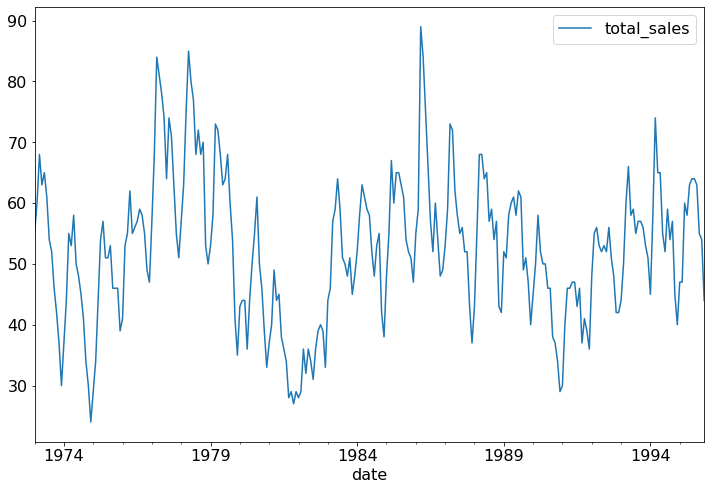

In [6]:
housing.plot()

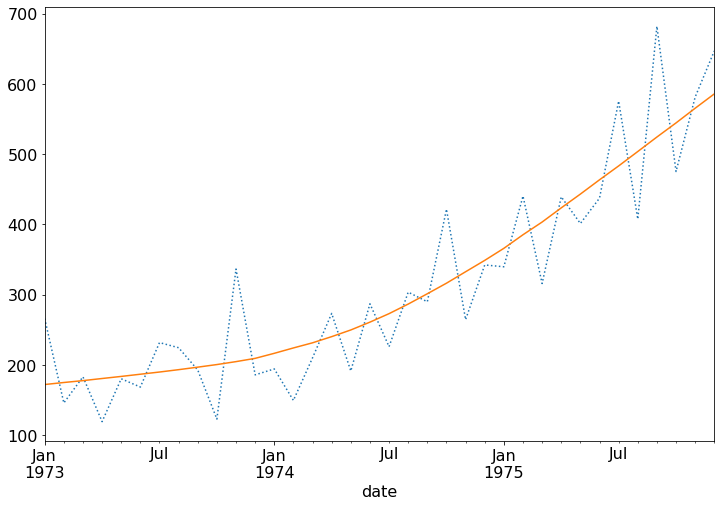

In [22]:
smoothed = lowess(shampoo['total_sales'], shampoo.index, return_sorted=False)

shampoo['loess_smoothed'] = smoothed

shampoo['total_sales'].plot(linestyle='dotted')
shampoo['loess_smoothed'].plot()

In [23]:
lowess??

In [16]:
housing.shape

(275, 1)